### Moammer Kayada Kamal
### 2209106039
### A2'22
### Posttest 6


### link dataset
### https://drive.google.com/file/d/1GTT-9sbey8zlqMAcwvW_e7P7idnlR78O/view?usp=drive_link

## Import libraries yang digunakan dan jangan lupa baca data

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df=pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


## Cek nilai Null dan duplikat, karna data saya ada nilai null maka kita bersihkan ##

In [4]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [5]:
df['loan_limit'].fillna(df['loan_limit'].mode()[0],inplace=True)
df['approv_in_adv'].fillna(df['approv_in_adv'].mode()[0],inplace=True)
df['loan_purpose'].fillna(df['loan_purpose'].mode()[0],inplace=True)
df['Neg_ammortization'].fillna(df['Neg_ammortization'].mode()[0],inplace=True)
df['income'].fillna(df['income'].mode()[0],inplace=True)
df['dtir1'].fillna(df['dtir1'].mode()[0],inplace=True)

df['rate_of_interest'].fillna(df['rate_of_interest'].mean(),inplace=True)
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean(),inplace=True)
df['Upfront_charges'].fillna(df['Upfront_charges'].mean(),inplace=True)
df['term'].fillna(df['term'].mean(),inplace=True)
df['property_value'].fillna(df['property_value'].mean(),inplace=True)

In [6]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
Interest_rate_spread             0
Upfront_charges                  0
term                             0
Neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value                   0
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                           0
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [7]:
df.duplicated().sum()

0

## kita cek dulu info database kita ##

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

## Kita pilih fitur X dan Y sebagai target ##

In [9]:
X = df['loan_amount'] 
y = df['Status']

## Kita split datanya untuk di latih dan di test dengan size 20% ##

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## kita buat model DNN menggunakan sequential model dengan beberapa layer dan model compilenya menggunakan optimizer adam lossnya binary dan metrics accuracy ##

In [16]:
model = Sequential([
    layers.Dense(20, activation='relu', input_shape=[1]),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Kita lakukan training pada model dengan model data fit ##

In [19]:
hist=model.fit(X_train,y_train, epochs=10 ,validation_split =0.2,batch_size=32)


Epoch 1/10
2974/2974 [==============================] - 8s 3ms/step - loss: 0.5592 - accuracy: 0.7529 - val_loss: 0.5598 - val_accuracy: 0.7525
Epoch 2/10
2974/2974 [==============================] - 9s 3ms/step - loss: 0.5592 - accuracy: 0.7529 - val_loss: 0.5598 - val_accuracy: 0.7525
Epoch 3/10
2974/2974 [==============================] - 8s 3ms/step - loss: 0.5592 - accuracy: 0.7529 - val_loss: 0.5596 - val_accuracy: 0.7525
Epoch 4/10
2974/2974 [==============================] - 8s 3ms/step - loss: 0.5592 - accuracy: 0.7529 - val_loss: 0.5596 - val_accuracy: 0.7525
Epoch 5/10
2974/2974 [==============================] - 8s 3ms/step - loss: 0.5592 - accuracy: 0.7529 - val_loss: 0.5596 - val_accuracy: 0.7525
Epoch 6/10
2974/2974 [==============================] - 10s 3ms/step - loss: 0.5592 - accuracy: 0.7529 - val_loss: 0.5596 - val_accuracy: 0.7525
Epoch 7/10
2974/2974 [==============================] - 10s 3ms/step - loss: 0.5592 - accuracy: 0.7529 - val_loss: 0.5595 - val_accurac

## Kita cek akurasinya ##

In [20]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Akurasi:", accuracy)

930/930 [==============================] - 2s 2ms/step
Akurasi: 0.7565077016210399


## Kita tampilkan plot berdasarkan dua model yaitu model accuracy dan model loss
## *Model Accuracy:
## -Train: Sangat stabil di angka 0.75290
## -Test: Sangat stabil dibawah 0.75255
## *Model Loss:
## -Train: Berawal dari 0.5598 dan berakhir turun cukup stabil di sekitaran 0.5595
## -Test:cukup stabil diangka sekitar 0.5593 ##

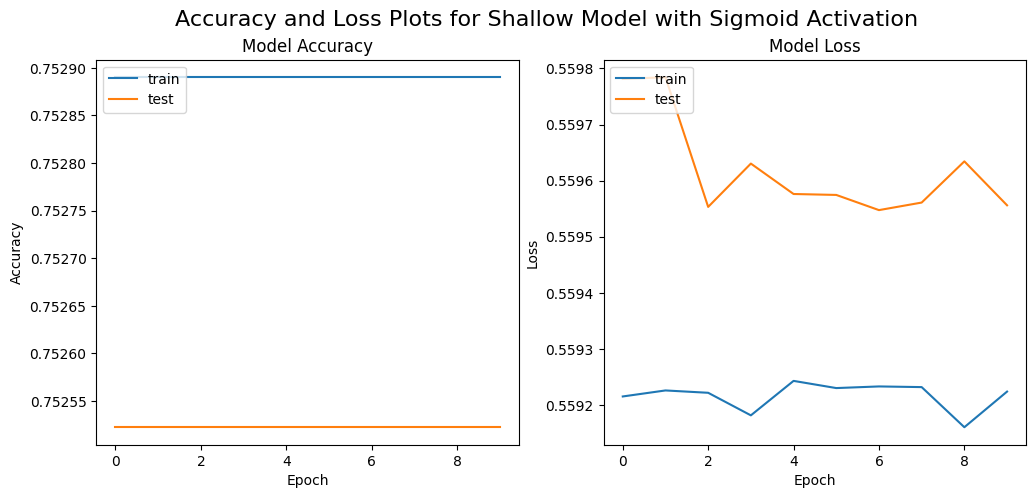

In [21]:
import matplotlib.pyplot as plt
def plot_acc_loss(history, model_name):
    # Plot the accuracy and loss graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')

    fig.suptitle(f"Accuracy and Loss Plots for {model_name}", fontsize=16)
    plt.show()

plot_acc_loss(hist, "Shallow Model with Sigmoid Activation")